 # <div style="text-align: center">Tutorial on Ensemble Learning (Don't Overfit) </div>
 <img src='https://data-science-blog.com/wp-content/uploads/2017/12/ensemble-learning-stacking.png' width=400 height=400 >
### <div style="text-align: center"> Quite Practical and Far from any Theoretical Concepts </div>
<div style="text-align:center">last update: <b>18/02/2019</b></div>


>You are reading **10 Steps to Become a Data Scientist** and are now in the 8th step : 

1. [Leren Python](https://www.kaggle.com/mjbahmani/the-data-scientist-s-toolbox-tutorial-1)
2. [Python Packages](https://www.kaggle.com/mjbahmani/the-data-scientist-s-toolbox-tutorial-2)
3. [Mathematics and Linear Algebra](https://www.kaggle.com/mjbahmani/linear-algebra-for-data-scientists)
4. [Programming &amp; Analysis Tools](https://www.kaggle.com/mjbahmani/20-ml-algorithms-15-plot-for-beginners)
5. [Big Data](https://www.kaggle.com/mjbahmani/a-data-science-framework-for-quora)
6. [Data visualization](https://www.kaggle.com/mjbahmani/top-5-data-visualization-libraries-tutorial)
7. [Data Cleaning](https://www.kaggle.com/mjbahmani/machine-learning-workflow-for-house-prices)
8. <font color="red">You are in the 8th step</font>
9. [A Comprehensive ML  Workflow with Python](https://www.kaggle.com/mjbahmani/a-comprehensive-ml-workflow-with-python)
10. [Deep Learning](https://www.kaggle.com/mjbahmani/top-5-deep-learning-frameworks-tutorial)


you can Fork and Run this kernel on <font color="red">Github</font>:

> [ GitHub](https://github.com/mjbahmani/10-steps-to-become-a-data-scientist)

 **I hope you find this kernel helpful and some <font color='red'> UPVOTES</font> would be very much appreciated**
 
 -----------

<a id="top"></a> <br>
## Notebook  Content
1. [Introduction](#1)
1. [Import packages](#2)
    1. [Version](#21)
    1. [Setup](#22)
    1. [Data Collection](#23)
1. [What's Ensemble Learning?](#3)
    1. [Why Ensemble Learning?](#31)
1. [Ensemble Techniques](#4)
    1. [what-is-the-difference-between-bagging-and-boosting?](#41)
1. [Model Deployment](#5)
    1. [Prepare Features & Targets](#51)
    1. [RandomForest](#52)
    1. [Bagging classifier ](#53)
    1. [AdaBoost](#54)
    1. [Gradient Boosting Classifier](#55)
    1. [Linear Discriminant Analysis](#56)
    1. [Quadratic Discriminant Analysis](#57)
1. [Conclusion](#6)
1. [References & Credits](#7)

<a id="1"></a> <br>
#  1- Introduction
In this kernel, I want to start explorer everything about **Ensemble modeling**. I will run plenty of algorithms on various datasets. I hope you enjoy and give me feedback.

<a id="2"></a> <br>
## 2- Import packages

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from pandas import get_dummies
import plotly.graph_objs as go
from sklearn import datasets
import plotly.plotly as py
import seaborn as sns
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import scipy
import numpy
import json
import sys
import csv
import os

<a id="21"></a> <br>
### 2-1 Version

In [113]:
print('matplotlib: {}'.format(matplotlib.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('scipy: {}'.format(scipy.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))

matplotlib: 2.2.3
sklearn: 0.20.2
scipy: 1.1.0
seaborn: 0.9.0
pandas: 0.23.4
numpy: 1.16.0
Python: 3.6.6 |Anaconda, Inc.| (default, Oct  9 2018, 12:34:16) 
[GCC 7.3.0]


<a id="22"></a> <br>
### 2-2 Setup

A few tiny adjustments for better **code readability**

In [114]:
warnings.filterwarnings('ignore')
sns.set(color_codes=True)
plt.style.available
%matplotlib inline
%precision 2

'%.2f'

<a id="23"></a> <br>
### 2-3 Data Collection
we have used  Two Sigma  data sets

In [115]:
import os
print([filename for filename in os.listdir('../input') if '.csv' in filename])

['train.csv', 'sample_submission.csv', 'test.csv']


In [116]:
# import Dataset to play with it
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [117]:
sample_submission = pd.read_csv('../input/sample_submission.csv')
sample_submission.head()

,id,target
0,250,0
1,251,0
2,252,0
3,253,0
4,254,0


**<< Note 1 >>**

* Each row is an observation (also known as : sample, example, instance, record)
* Each column is a feature (also known as: Predictor, attribute, Independent Variable, input, regressor, Covariate)

In [118]:
train.shape, test.shape, sample_submission.shape

((250, 302), (19750, 301), (19750, 2))

In [119]:
train.head()

,id,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,-2.246,1.825,-0.912,-0.107,0.305,0.102,0.826,0.417,0.177,-0.673,-0.503,1.864,0.410,-1.927,0.102,-0.931,1.763,1.449,-1.097,-0.686,-0.250,-1.859,1.125,1.009,-2.296,0.385,-0.876,1.528,-0.144,-1.078,...,-0.681,1.250,-0.565,-1.318,-0.923,0.075,-0.704,2.457,0.771,-0.460,0.569,-1.320,-1.516,-2.145,-1.120,0.156,0.820,-1.049,-1.125,0.484,0.617,1.253,1.248,0.504,-0.802,-0.896,-1.793,-0.284,-0.601,0.569,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,0.004,-0.291,2.907,1.085,2.144,1.540,0.584,1.133,1.098,-0.237,-0.498,0.283,-1.100,-0.417,1.382,-0.515,-1.519,0.619,-0.128,0.866,-0.540,1.238,-0.227,0.269,-0.390,-2.721,1.659,0.106,-0.121,1.719,...,0.971,-1.489,0.530,0.917,-0.094,-1.407,0.887,-0.104,-0.583,1.267,-1.667,-2.771,-0.516,1.312,0.491,0.932,2.064,0.422,1.215,2.012,0.043,-0.307,-0.059,1.121,1.333,0.211,1.753,0.053,1.274,-0.612,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,0.137,0.183,0.459,0.478,-0.425,0.352,1.095,0.300,-1.044,0.270,-1.038,0.144,-1.658,-0.946,0.633,-0.772,1.786,0.136,-0.103,-1.223,2.273,0.055,-2.032,-0.452,0.064,0.924,-0.692,-0.067,-0.917,1.896,...,-0.540,-0.299,1.074,-0.748,1.086,-0.766,-0.931,0.432,1.345,-0.491,-1.602,-0.727,0.346,0.780,-0.527,-1.122,-0.208,-0.730,-0.302,2.535,-1.045,0.037,0.020,1.373,0.456,-0.277,1.381,1.843,0.749,0.202,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,0.503,0.274,0.335,-1.148,0.067,-1.010,1.048,-1.442,0.210,0.836,-0.326,0.716,-0.764,0.248,-1.308,2.127,0.365,0.296,-0.808,1.854,0.118,0.380,0.999,-1.171,2.798,0.394,-1.048,1.078,0.401,-0.486,...,-0.083,-0.831,1.251,-0.206,-0.933,-1.215,0.281,0.512,-0.424,0.769,0.223,-0.710,2.725,0.176,0.845,-1.226,1.527,-1.701,0.597,0.150,1.864,0.322,-0.214,1.282,0.408,-0.910,1.020,-0.299,-1.574,-1.618,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,4,1.0,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,-0.012,2.198,0.190,0.453,0.494,1.478,-1.412,0.270,-1.312,-0.322,-0.688,-0.198,-0.285,1.042,-0.315,-0.478,0.024,-0.190,1.656,-0.469,-1.437,-0.581,-0.308,-0.837,-1.739,0.037,0.336,-1.102,2.371,0.554,...,-1.050,-0.347,0.904,-1.324,-0.849,3.432,0.222,0.416,0.174,-1.517,-0.337,0.055,-0.464,0.014,-1.073,0.325,-0.523,-0.692,0.190,-0.883,-1.830,1.408,2.319,1.704,-0.723,1.014,0.064,0.096,-0.775,1.845,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253


In [120]:
test.head()

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,250,0.500,-1.033,-1.595,0.309,-0.714,0.502,0.535,-0.129,-0.687,1.291,0.507,-0.317,1.848,-0.232,-0.340,-0.051,0.804,0.764,1.860,0.262,1.112,-0.491,-1.039,-0.492,0.183,-0.671,-1.313,0.149,0.244,1.072,-1.003,0.832,-1.075,1.988,1.201,-2.065,-0.826,-0.016,0.490,...,0.824,0.928,1.372,1.505,0.645,0.641,-1.132,1.009,0.998,0.210,-1.634,1.046,0.114,-0.806,0.301,0.145,-0.684,0.794,-0.290,-1.688,0.313,1.140,0.447,-0.616,1.294,0.785,0.453,1.550,-0.866,1.007,-0.088,-2.628,-0.845,2.078,-0.277,2.132,0.609,-0.104,0.312,0.979
1,251,0.776,0.914,-0.494,1.347,-0.867,0.480,0.578,-0.313,0.203,1.356,-1.086,0.322,0.876,-0.563,-1.394,0.385,1.891,-2.107,-0.636,-0.055,-0.843,0.041,0.253,0.557,0.475,-0.839,-1.146,1.210,1.427,0.347,1.077,-0.194,0.323,0.543,0.894,1.190,0.342,-0.858,0.756,...,-1.791,0.122,-0.669,-1.558,-0.244,2.583,-0.829,0.133,-2.746,0.341,-1.145,0.492,0.437,-0.628,0.271,2.639,0.481,-0.687,1.017,1.648,-1.272,-0.797,-0.870,-1.582,-1.987,-0.052,-0.194,0.539,-1.788,-0.433,-0.683,-0.066,0.025,0.606,-0.353,-1.133,-3.138,0.281,-0.625,-0.761
2,252,1.750,0.509,-0.057,0.835,-0.476,1.428,-0.701,-2.009,-1.378,0.167,-0.132,0.459,-0.341,0.014,0.184,-0.460,-0.991,-1.039,0.992,1.036,1.552,-0.830,1.374,-0.914,0.427,0.027,0.327,1.117,0.871,-2.556,-0.036,-0.081,0.744,-1.191,-1.784,0.239,0.500,0.437,0.746,...,-1.167,1.009,-0.180,-0.683,-1.383,1.020,0.268,-1.558,0.620,-0.489,-2.090,-0.977,1.672,-0.655,-0.801,-1.846,0.761,-0.846,0.181,0.962,-0.611,1.450,0.021,0.320,-0.951,-2.662,0.761,-0.665,-0.619,-0.645,-0.094,0.351,-0.607,-0.737,-0.031,0.701,0.976,0.135,-1.327,2.463
3,253,-0.556,-1.855,-0.682,0.578,1.592,0.512,-1.419,0.722,0.511,0.567,0.356,-0.060,0.767,-0.196,0.359,0.080,-0.956,0.857,-0.655,-0.090,-0.008,-0.596,-0.413,-1.030,0.173,-0.969,0.998,0.079,0.790,-0.776,-0.374,-1.995,0.572,0.542,0.547,0.307,-0.074,1.703,-0.003,...,-1.029,-0.340,0.052,2.122,-0.136,-1.799,1.450,1.866,-0.273,-0.237,-0.207,-0.196,-1.106,-1.560,-0.934,2.167,0.323,0.583,1.480,-0.685,-0.473,-1.066,-0.271,0.506,-0.753,1.048,-0.450,-0.300,-1.221,0.235,-0.336,-0.787,0.255,-0.031,-0.836,0.916,2.411,1.053,-1.601,-1.529
4,254,0.754,-0.245,1.173,-1.623,0.009,0.370,0.781,-1.763,-1.432,-0.930,-0.098,0.896,0.293,-0.259,0.030,-0.661,0.921,0.006,-0.631,1.284,-1.167,-0.744,-2.184,2.146,1.130,0.017,1.421,-0.590,1.938,-0.194,0.794,0.579,0.521,0.635,-0.023,-0.892,-0.363,-0.360,0.405,...,-0.486,-0.068,-0.534,-1.322,0.500,0.263,-0.745,0.578,-0.064,0.738,-0.280,0.745,-0.588,-0.429,-0.588,0.154,-1.187,1.681,-0.832,-0.437,-0.038,-1.096,-0.156,3.565,-0.428,-0.384,1.243,-0.966,1.525,0.458,2.184,-1.090,0.216,1.186,-0.143,0.322,-0.068,-0.156,-1.153,0.825


In [121]:
train.tail()

,id,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
245,245,0.0,-1.199,0.466,-0.908,2.771,1.631,0.931,0.182,-0.652,-0.512,0.400,1.608,0.937,1.663,0.696,-1.874,1.044,0.851,-1.070,-0.095,-1.386,-0.219,0.101,0.250,-0.465,-0.455,0.538,2.581,-1.612,1.166,1.682,-1.574,-0.304,0.355,-1.416,-0.823,0.359,-0.463,-1.869,...,1.588,-1.167,1.500,-1.643,-1.944,-1.121,1.055,1.794,0.986,-1.461,0.329,1.903,0.468,-1.826,-2.128,1.644,-0.598,0.176,-0.517,-1.146,1.911,-0.814,-0.073,0.155,0.323,1.060,0.324,0.460,2.213,-2.360,0.724,0.177,-0.039,0.759,0.461,-0.243,0.525,0.281,-0.255,-1.136
246,246,0.0,0.237,0.233,-0.380,-1.748,0.839,-0.721,-0.114,0.005,-1.788,1.416,-0.683,1.079,0.195,1.879,-0.025,-0.138,-0.276,-0.318,-0.485,0.408,-0.261,-0.536,0.276,0.568,-0.757,-0.915,0.989,-0.781,0.982,1.308,0.299,1.743,0.868,0.001,-0.261,-0.620,0.459,0.116,...,0.358,-0.302,-1.353,-1.546,-1.831,0.299,1.112,1.833,-0.420,-1.135,0.168,-0.794,-1.598,-1.133,-0.083,1.035,0.921,-1.279,1.123,-0.687,-0.243,1.435,-0.036,0.103,2.155,-0.806,-0.042,0.941,-1.469,0.457,0.857,0.147,0.601,-0.210,-0.768,1.004,-0.979,0.007,0.112,-0.558
247,247,0.0,1.411,-1.465,0.119,0.583,1.634,-0.207,1.173,1.622,-0.071,-0.695,-0.477,-1.582,-0.521,0.389,-1.137,0.395,0.032,0.152,-1.436,-0.799,-1.193,-0.196,-2.888,0.922,-1.011,1.041,-0.358,-0.642,1.241,1.615,1.995,0.301,-1.663,-0.024,-1.448,0.538,-0.725,-0.026,...,-1.142,0.248,1.507,0.189,-0.082,-1.621,0.906,-0.821,-0.611,0.851,0.095,-0.305,1.074,-1.352,0.937,-2.915,0.237,0.044,-1.755,-0.213,0.215,-1.978,1.075,1.832,-1.504,-0.181,1.460,-0.630,1.456,0.339,-0.499,-0.455,0.759,0.222,0.105,-0.727,0.461,0.760,0.168,-0.719
248,248,1.0,0.620,1.040,0.184,-0.570,-0.087,-0.748,-1.559,-0.553,0.552,1.284,0.944,0.306,1.222,-1.280,0.962,0.685,-1.320,-0.359,0.614,2.486,0.438,-1.147,0.179,-1.005,-0.798,-0.296,-0.077,-0.755,0.046,-0.709,1.027,-0.264,-1.324,-0.630,0.527,1.153,-1.388,-0.172,...,0.331,-1.262,-0.262,0.661,1.289,-1.794,-0.703,-0.666,-0.472,-1.098,1.838,-0.186,-0.480,-1.476,0.742,-0.481,-0.429,-1.270,1.448,-0.204,0.465,0.980,1.941,0.656,2.384,-1.480,-0.239,1.129,2.548,-0.120,0.557,-1.494,0.977,0.882,-1.512,0.478,-0.910,-0.805,2.029,-0.423
249,249,0.0,0.489,0.403,0.139,-2.046,1.345,0.122,1.255,0.647,-0.107,0.915,-1.514,-0.924,0.680,0.598,0.290,-0.130,0.083,-1.633,-0.686,-0.493,-1.127,-0.174,0.714,-0.130,1.518,0.718,1.351,-0.877,-0.625,1.430,-0.136,-0.468,-0.748,-0.600,0.434,-0.955,-1.558,1.683,...,-0.682,0.847,0.140,0.174,-0.584,-1.810,0.674,0.411,0.238,-0.032,0.496,-0.294,-1.313,-1.510,0.458,0.356,0.615,0.066,0.328,-0.007,-1.229,0.548,0.705,-0.147,-0.592,0.082,-0.453,0.440,-0.434,0.216,-0.025,1.305,-1.169,1.413,0.517,0.812,0.269,-1.454,-0.625,1.474


In [122]:
train.columns

Index(['id', 'target', '0', '1', '2', '3', '4', '5', '6', '7',
       ...
       '290', '291', '292', '293', '294', '295', '296', '297', '298', '299'],
      dtype='object', length=302)

In [123]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Columns: 302 entries, id to 299
dtypes: float64(301), int64(1)
memory usage: 589.9 KB
None


<a id="3"></a> <br>
## 3- What's Ensemble Learning?
let us, review some defination on Ensemble Learning:

1. **Ensemble learning** is the process by which multiple models, such as classifiers or experts, are strategically generated and combined to solve a particular computational intelligence problem[9]
1. **Ensemble Learning** is a powerful way to improve the performance of your model. It usually pays off to apply ensemble learning over and above various models you might be building. Time and again, people have used ensemble models in competitions like Kaggle and benefited from it.[6]
1. **Ensemble methods** are techniques that create multiple models and then combine them to produce improved results. Ensemble methods usually produces more accurate solutions than a single model would.[10]
<img src='https://hub.packtpub.com/wp-content/uploads/2018/02/ensemble_machine_learning_image_1-600x407.png'  width=400 height=400>
[img-ref](https://hub.packtpub.com/wp-content/uploads/2018/02/ensemble_machine_learning_image_1-600x407.png)

> <font color="red"><b>Note</b></font>
Ensemble Learning is a Machine Learning concept in which the idea is to train multiple models using the same learning algorithm. The ensembles take part in a bigger group of methods, called multiclassifiers, where a set of hundreds or thousands of learners with a common objective are fused together to solve the problem.[11]

> <font color="red"><b>Note</b></font>
This Kernel assumes a basic understanding of Machine Learning algorithms. I would recommend going through this [**kernel**](https://www.kaggle.com/mjbahmani/a-comprehensive-ml-workflow-with-python)  to familiarize yourself with these concepts.

[go to top](#top)

<a id="31"></a> <br>
## 3-1 Why Ensemble Learning?
1. Difference in population
1. Difference in hypothesis
1. Difference in modeling technique
1. Difference in initial seed
<br>
[go to top](#top)

<a id="4"></a> <br>
# 4- Ensemble Techniques
The goal of any machine learning problem is to find a single model that will best predict our wanted outcome. Rather than making one model and hoping this model is the best/most accurate predictor we can make, ensemble methods take a myriad of models into account, and average those models to produce one final model.[12]
<img src='https://uploads.toptal.io/blog/image/92062/toptal-blog-image-1454584029018-cffb1b601292e8d328556e355ed4f7e0.jpg' width=300 height=300>
[img-ref](https://www.toptal.com/machine-learning/ensemble-methods-machine-learning)
1. Voting
1. Weighted Average 
1. Stacking
1. Blending
1. Bagging  
1. Boosting 

<a id="41"></a> <br>
## 4-1 What is the difference between bagging and boosting?
1. **Bagging**: It is the method to decrease the variance of model by generating additional data for training from your original data set using combinations with repetitions to produce multisets of the same size as your original data.
    1. Bagging meta-estimator
    1. Random forest
1. **Boosting**: It helps to calculate the predict the target variables using different models and then average the result( may be using a weighted average approach).
    1. AdaBoost
    1. GBM
    1. XGBM
    1. Light GBM
    1. CatBoost
    
<img src='https://www.globalsoftwaresupport.com/wp-content/uploads/2018/02/ds33ggg.png'>
[img-ref](https://www.globalsoftwaresupport.com/boosting-adaboost-in-machine-learning/)
<br>
[go to top](#top)

<a id="5"></a> <br>
## 5- Some Ensemble  Model
In this section have been applied more than **5 learning algorithms** that play an important rule in your experiences and improve your knowledge in case of ML technique.

> **<< Note 3 >>** : The results shown here may be slightly different for your analysis because, for example, the neural network algorithms use random number generators for fixing the initial value of the weights (starting points) of the neural networks, which often result in obtaining slightly different (local minima) solutions each time you run the analysis. Also note that changing the seed for the random number generator used to create the train, test, and validation samples can change your results.
<br>
[go to top](#top)

<a id="51"></a> <br>
## 5-1 Prepare Features & Targets
First of all seperating the data into dependent(Feature) and independent(Target) variables.

**<< Note 4 >>**
* X==>>Feature
* y==>>Target

In [124]:
train['target'].value_counts()

1.0    160
0.0     90
Name: target, dtype: int64

In [125]:
cols=["target","id"]
X = train.drop(cols,axis=1)
y = train["target"]

In [126]:
X_test  = test.drop("id",axis=1)

In [127]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 0)

After loading the data via **pandas**, we should checkout what the content is, description and via the following:
<br>
[go to top](#top)

<a id="52"></a> <br>
## 5-2 RandomForest
A random forest is a meta estimator that **fits a number of decision tree classifiers** on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

In [128]:
from sklearn.ensemble import RandomForestClassifier
Model=RandomForestClassifier(max_depth=2)
Model.fit(X_train,y_train)
y_pred=Model.predict(X_val)
print(classification_report(y_pred,y_val))
print(confusion_matrix(y_pred,y_val))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_val))

              precision    recall  f1-score   support

         0.0       0.05      0.50      0.10         2
         1.0       0.97      0.62      0.76        48

   micro avg       0.62      0.62      0.62        50
   macro avg       0.51      0.56      0.43        50
weighted avg       0.93      0.62      0.73        50

[[ 1  1]
 [18 30]]
accuracy is  0.62


<a id="53"></a> <br>
## 5-3 Bagging classifier 
A Bagging classifier is an ensemble **meta-estimator** that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

This algorithm encompasses several works from the literature. When random subsets of the dataset are drawn as random subsets of the samples, then this algorithm is known as Pasting . If samples are drawn with replacement, then the method is known as Bagging . When random subsets of the dataset are drawn as random subsets of the features, then the method is known as Random Subspaces . Finally, when base estimators are built on subsets of both samples and features, then the method is known as Random Patches .[http://scikit-learn.org]
<br>
[go to top](#top)

In [129]:
from sklearn.ensemble import BaggingClassifier
bag_Model=BaggingClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_val)
print(classification_report(y_pred,y_val))
print(confusion_matrix(y_pred,y_val))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_val))

              precision    recall  f1-score   support

         0.0       0.11      0.67      0.18         3
         1.0       0.97      0.64      0.77        47

   micro avg       0.64      0.64      0.64        50
   macro avg       0.54      0.65      0.48        50
weighted avg       0.92      0.64      0.73        50

[[ 2  1]
 [17 30]]
accuracy is  0.64


<a id="54"></a> <br>
##  5-4 AdaBoost classifier

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.
This class implements the algorithm known as **AdaBoost-SAMME** .

In [130]:
from sklearn.ensemble import AdaBoostClassifier
Model=AdaBoostClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_val)
print(classification_report(y_pred,y_val))
print(confusion_matrix(y_pred,y_val))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_val))

              precision    recall  f1-score   support

         0.0       0.37      0.70      0.48        10
         1.0       0.90      0.70      0.79        40

   micro avg       0.70      0.70      0.70        50
   macro avg       0.64      0.70      0.64        50
weighted avg       0.80      0.70      0.73        50

[[ 7  3]
 [12 28]]
accuracy is  0.7


<a id="55"></a> <br>
## 5-5 Gradient Boosting Classifier
GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions.

In [131]:
from sklearn.ensemble import GradientBoostingClassifier
Model=GradientBoostingClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_val)
print(classification_report(y_pred,y_val))
print(confusion_matrix(y_pred,y_val))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_val))

              precision    recall  f1-score   support

         0.0       0.37      0.70      0.48        10
         1.0       0.90      0.70      0.79        40

   micro avg       0.70      0.70      0.70        50
   macro avg       0.64      0.70      0.64        50
weighted avg       0.80      0.70      0.73        50

[[ 7  3]
 [12 28]]
accuracy is  0.7


<a id="56"></a> <br>
## 5-6 Linear Discriminant Analysis
Linear Discriminant Analysis (discriminant_analysis.LinearDiscriminantAnalysis) and Quadratic Discriminant Analysis (discriminant_analysis.QuadraticDiscriminantAnalysis) are two classic classifiers, with, as their names suggest, a **linear and a quadratic decision surface**, respectively.

These classifiers are attractive because they have closed-form solutions that can be easily computed, are inherently multiclass, have proven to work well in practice, and have no **hyperparameters** to tune.

In [132]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
Model=LinearDiscriminantAnalysis()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_val)
print(classification_report(y_pred,y_val))
print(confusion_matrix(y_pred,y_val))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_val))

              precision    recall  f1-score   support

         0.0       0.37      0.44      0.40        16
         1.0       0.71      0.65      0.68        34

   micro avg       0.58      0.58      0.58        50
   macro avg       0.54      0.54      0.54        50
weighted avg       0.60      0.58      0.59        50

[[ 7  9]
 [12 22]]
accuracy is  0.58


<a id="57"></a> <br>
## 5-7 Quadratic Discriminant Analysis
A classifier with a quadratic decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.

The model fits a **Gaussian** density to each class.

In [133]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
Model=QuadraticDiscriminantAnalysis()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_val)
print(classification_report(y_pred,y_val))
print(confusion_matrix(y_pred,y_val))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_val))

              precision    recall  f1-score   support

         0.0       0.47      0.33      0.39        27
         1.0       0.42      0.57      0.48        23

   micro avg       0.44      0.44      0.44        50
   macro avg       0.45      0.45      0.44        50
weighted avg       0.45      0.44      0.43        50

[[ 9 18]
 [10 13]]
accuracy is  0.44


<a id="6"></a> <br>
## 6- Don't Overfit
In this section, we will solve the Don't Overfit problem

## 6-1 feature importance
In this section, I have used this [tutorials](https://www.kaggle.com/dansbecker/permutation-importance), that is amazing for Permutation Importance

In [134]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
rfc_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

Here is how to calculate and show importances with the [eli5](https://eli5.readthedocs.io/en/latest/) library:

In [135]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rfc_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist(),top=70)

Weight,Feature
0.0222 ± 0.0254,26
0.0190 ± 0.0238,264
0.0190 ± 0.0127,116
0.0190 ± 0.0238,163
0.0159 ± 0.0000,165
0.0127 ± 0.0127,217
0.0095 ± 0.0381,33
0.0095 ± 0.0324,260
0.0095 ± 0.0156,117
0.0095 ± 0.0254,282


## Interpreting Permutation Importances
1. The values towards the top are the most important features, and those towards the bottom matter least.

1. The first number in each row shows how much model performance decreased with a random shuffling (in this case, using "accuracy" as the performance metric).

1. Like most things in data science, there is some randomness to the exact performance change from a shuffling a column. We measure the amount of randomness in our permutation importance calculation by repeating the process with multiple shuffles. The number after the ± measures how performance varied from one-reshuffling to the next. [14]

## Partial Dependence Plots
While feature importance shows what variables most affect predictions, partial dependence plots show how a feature affects predictions.[1]

In [136]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(train_X, train_y)

For the sake of explanation, I use a Decision Tree which you can see below.

In [137]:
features = [c for c in train.columns if c not in ['id', 'target']]

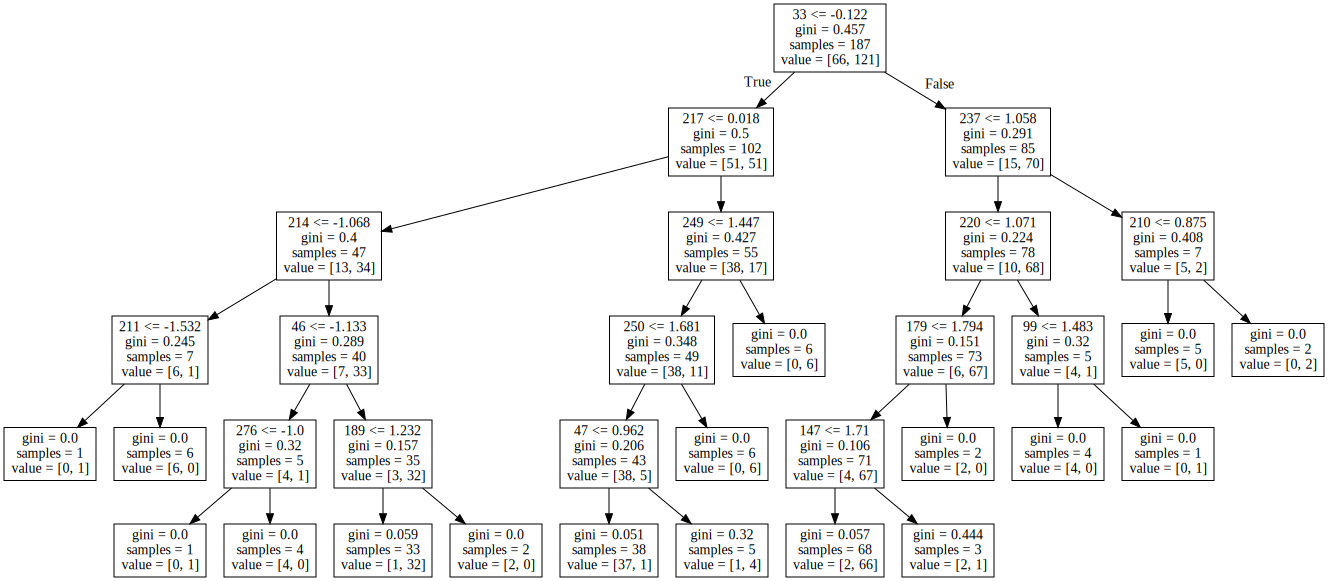

In [138]:
from sklearn import tree
import graphviz
tree_graph = tree.export_graphviz(tree_model, out_file=None, feature_names=features)
display(graphviz.Source(tree_graph))

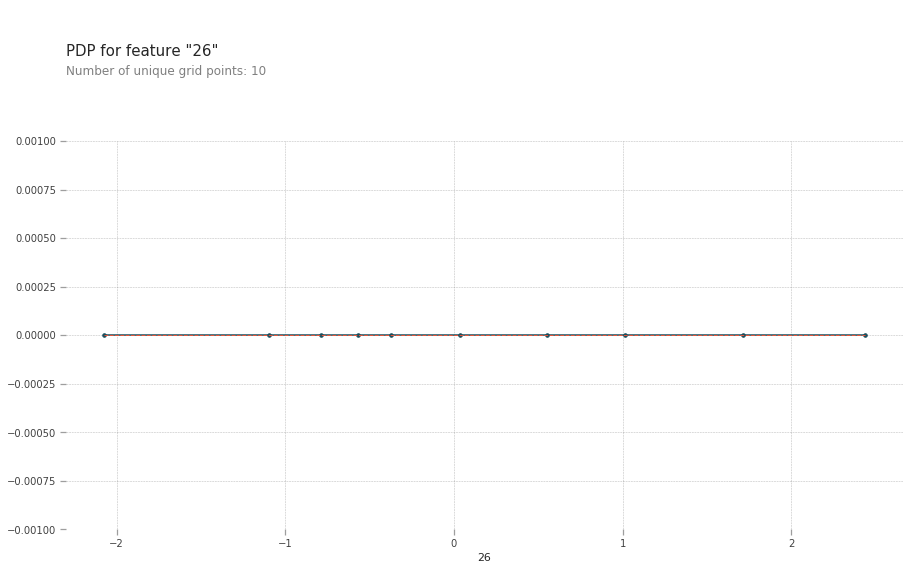

In [139]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=tree_model, dataset=val_X, model_features=features, feature='26')

# plot it
pdp.pdp_plot(pdp_goals, '26')
plt.show()

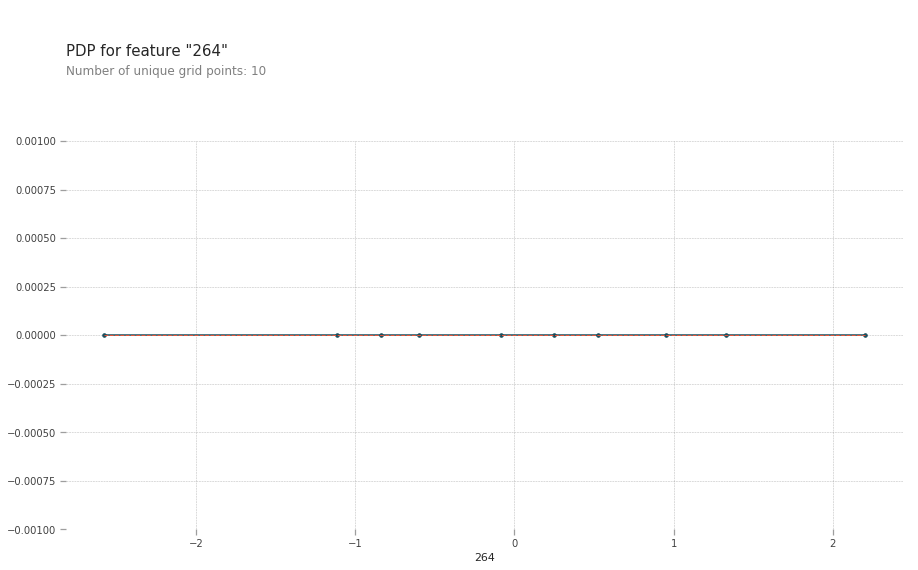

In [140]:
# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=tree_model, dataset=val_X, model_features=features, feature='264')

# plot it
pdp.pdp_plot(pdp_goals, '264')
plt.show()

<a id="7"></a> <br>
# 7-Conclusion
The Ensemble Learning generally prevents the **overfit**  and in many cases produces better results than other algorithms.
The success of the ensemble system is based on the variety of classifiers that make up it. If all classifiers provide the same output, a possible mistaken correction is not possible. So there should be different errors on different samples. If any classifier delivers a different error, then you can reduce the overall error by combining them strategically. Therefore, such a set of classifiers should be diverse. This variety can be achieved in a variety of ways.

and is not completed yet!!!
<br>
[go to top](#top)

you can follow me on:
> ###### [ GitHub](https://github.com/mjbahmani)
> ###### [Kaggle](https://www.kaggle.com/mjbahmani/)

  **I hope you find this kernel helpful and some <font color='red'> UPVOTES</font> would be very much appreciated**
 

<a id="8"></a> <br>
# 8-References & Credits

1. [datacamp](https://www.datacamp.com/community/tutorials/xgboost-in-python)
1. [Xgboost presentation](https://www.oreilly.com/library/view/data-science-from/9781491901410/ch04.html)
1. [machinelearningmastery](https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/)
1. [analyticsvidhya](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/)
1. [Github](https://github.com/mjbahmani)
1. [analyticsvidhya](https://www.analyticsvidhya.com/blog/2015/08/introduction-ensemble-learning/)
1. [ensemble-learning-python](https://www.datacamp.com/community/tutorials/ensemble-learning-python)
1. [image-header-reference](https://data-science-blog.com/blog/2017/12/03/ensemble-learning/)
1. [scholarpedia](http://www.scholarpedia.org/article/Ensemble_learning)
1. [toptal](https://www.toptal.com/machine-learning/ensemble-methods-machine-learning)
1. [quantdare](https://quantdare.com/what-is-the-difference-between-bagging-and-boosting/)
1. [towardsdatascience](https://towardsdatascience.com/ensemble-methods-in-machine-learning-what-are-they-and-why-use-them-68ec3f9fef5f)
1. [scikit-learn](https://scikit-learn.org/stable/modules/ensemble.html)
1. [permutation-importance](https://www.kaggle.com/dansbecker/permutation-importance)
1. [partial-plots](https://www.kaggle.com/dansbecker/partial-plots)

Go to first step: [**Course Home Page**](https://www.kaggle.com/mjbahmani/10-steps-to-become-a-data-scientist)

Go to next step : [**Mathematics and Linear Algebra**](https://www.kaggle.com/mjbahmani/linear-algebra-for-data-scientists)

## Not Completed yet!!!